**01 - Basic Expolratory Data Analysis**

In [ ]:
import tensorflow as tf
device_list = tf.test.gpu_device_name()
device_list

'/device:GPU:0'

In [1]:
#Importing Libraries

import base64
import numpy as np
import pandas as pd

# Imports for plots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
%matplotlib inline



In [2]:
import re
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from itertools import chain
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('/content/drive/MyDrive/vaccination_all_tweets.csv')

In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
print(df.shape)

(228207, 16)


In [ ]:
df.dtypes

id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                228207 non-null  int64 
 1   user_name         228205 non-null  object
 2   user_location     161296 non-null  object
 3   user_description  211189 non-null  object
 4   user_created      228207 non-null  object
 5   user_followers    228207 non-null  int64 
 6   user_friends      228207 non-null  int64 
 7   user_favourites   228207 non-null  int64 
 8   user_verified     228207 non-null  bool  
 9   date              228207 non-null  object
 10  text              228207 non-null  object
 11  hashtags          178504 non-null  object
 12  source            228088 non-null  object
 13  retweets          228207 non-null  int64 
 14  favorites         228207 non-null  int64 
 15  is_retweet        228207 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [ ]:
df.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [ ]:
#Identifying missing data

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

missing_data(df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,0,2,66911,17018,0,0,0,0,0,0,0,49703,119,0,0,0
Percent,0.0,0.000876,29.32031,7.457265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.779788,0.052146,0.0,0.0,0.0
Types,int64,object,object,object,object,int64,int64,int64,bool,object,object,object,object,int64,int64,bool


In [ ]:
#Identifying unique values

def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

unique_values(df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,228207,228205,161296,211189,228207,228207,228207,228207,228207,228207,228207,178504,228088,228207,228207,228207
Uniques,228207,85549,25458,84003,86739,22439,8196,38744,2,222093,226373,60221,379,451,986,1


In [ ]:
# Identifying Most frequent values

def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

most_frequent_values(df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,228207,228205,161296,211189,228207,228207,228207,228207,228207,228207,228207,178504,228088,228207,228207,228207
Most frequent item,1340539111971516416,CoWIN Blore 18-44,"Bengaluru, India","Get instant alerts for Free/Paid slots in BBMP, Bangalore Urban centers\n\nhttps://t.co/Vh4GH7Bb21",2021-06-29 09:33:13,24,0,0,False,2021-06-30 04:30:00,#COVAXIN vaccine approved for children aged 2 - 18 ... Another milestone in handling #COVID19 ... Well done scientists .,"['COVAXIN', 'BBMP']",Twitter for Android,0,0,False
Frequence,1,12210,19651,12185,12210,3703,29711,12062,209005,6,18,11113,58722,170505,118197,228207
Percent from total,0.0,5.35,12.183,5.77,5.35,1.623,13.019,5.286,91.586,0.003,0.008,6.226,25.745,74.715,51.794,100.0


In [ ]:
stop = stopwords.words('english')           
stop.extend(['from', 'subject', 're', 'edu', 'use','like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people', 
             'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said',
             'say', '\s', 'mr', 'Mr', 'said', 'says', 'saying', 'today', 'be',
             'one','two', 'three', 'four', 'five','six','seven','eight','nine','ten', 'however',
             'i', 'ii', 'iii','iv','v', 'vii', 'viii', 'ix', 'x', 'xi', 'xii','xiii', 'xiv', 
             'often', 'called', 'new', 'date', 'fully', 'thus', 'new', 'include', 'http',
             'www','doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et',
             'al', 'author', 'figure','rights', 'reserved', 'permission', 'used', 'using'])

df['text'] = df['text'].map(lambda x:  re.sub("@[A-Za-z0-9]+","",x)) # Remove the mentions
df['text'] = df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0]) # Remove the links
df['text'] = df['text'].str.lower()# Turn them into lowercase
df['text'] = df['text'].map(lambda x: re.sub(r"[^\w+( +\w+)*$]", '', x)) # Remove special characters
df['text'] = df['text'].map(lambda x:  re.sub(r'\s{2,}', ' ', x)) # Remove the doubled spaces
df['text'] = df['text'].map(lambda x:  re.sub(r'@\w+', '', x)) # Remove Mentions
df['text'] = df['text'].map(lambda x:  re.sub(r'[^\x00-\x7F]+', ' ', x)) # Remove Unicode
df['text'] = df.text.str.replace("[^\w\s]", "",regex=True) # Remove punctuation
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) # Remove stopwords
df['text'] = df['text'].str.replace('\d+', '',regex=True) # Remove digits

In [ ]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

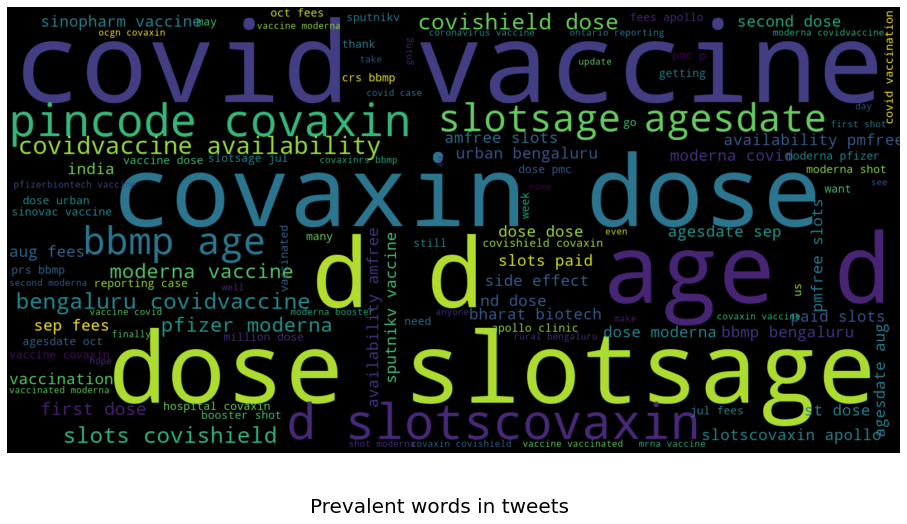

In [ ]:
show_wordcloud(df['text'], title = 'Prevalent words in tweets')

**02 - Tweets Sentiment Analysis**

In [ ]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral" 

In [ ]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

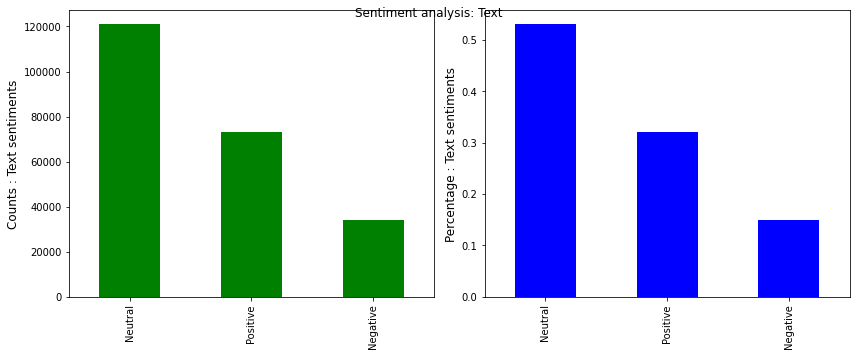

In [ ]:
df['sentiment'] = df['text'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'sentiment', 'Text')

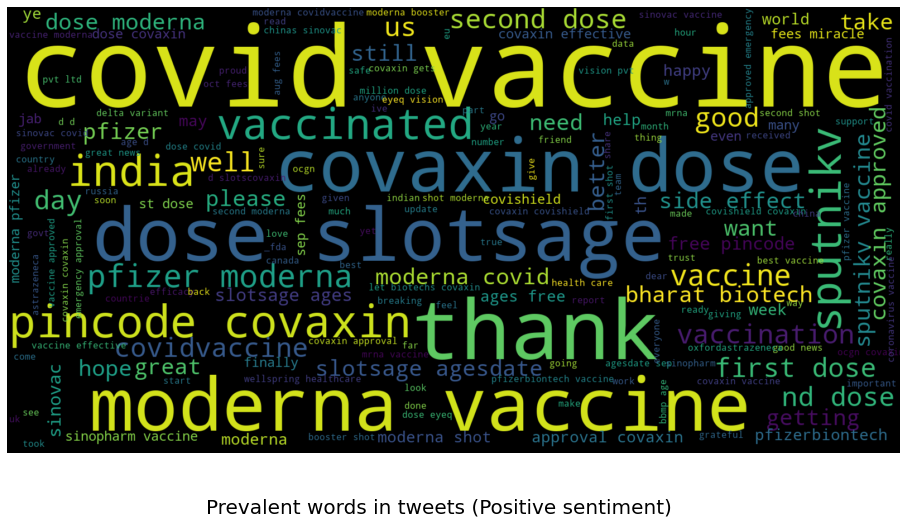

In [ ]:
show_wordcloud(df.loc[df['sentiment']=='Positive', 'text'], title = 'Prevalent words in tweets (Positive sentiment)')

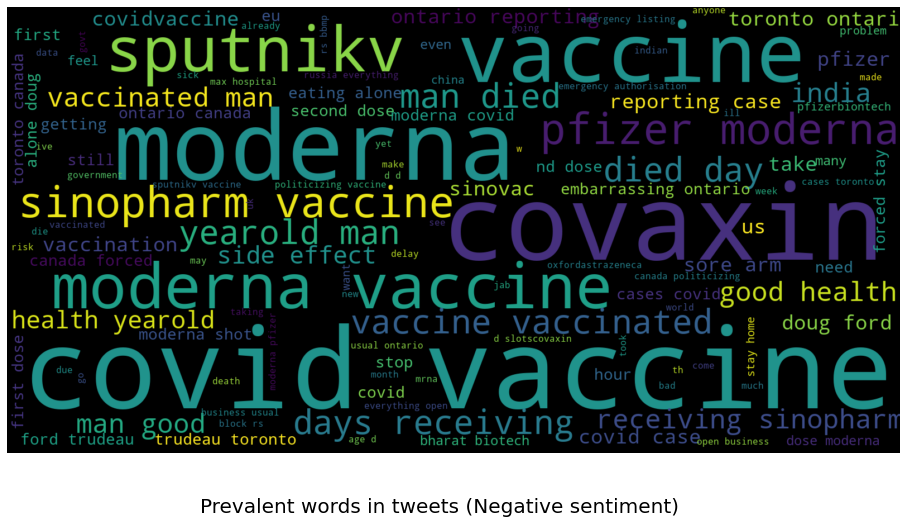

In [ ]:
show_wordcloud(df.loc[df['sentiment']=='Negative', 'text'], title = 'Prevalent words in tweets (Negative sentiment)')

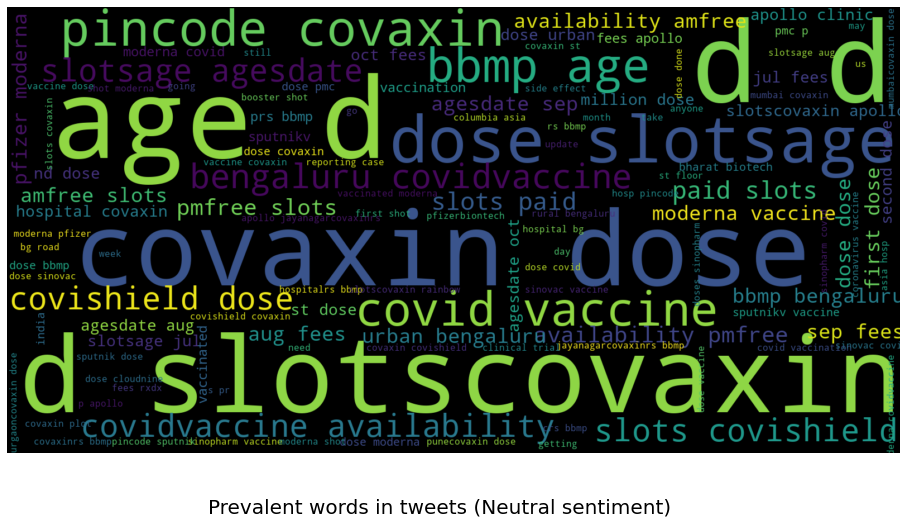

In [ ]:
show_wordcloud(df.loc[df['sentiment']=='Neutral', 'text'], title = 'Prevalent words in tweets (Neutral sentiment)')

**03 - Natural Language Processing**

In [3]:
#Tokenization

from nltk import word_tokenize, pos_tag

# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [ ]:
text = df['text']

In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
nltk.download('averaged_perceptron_tagger')

text_nouns_adj = pd.DataFrame(text.apply(nouns_adj))
text_nouns_adj

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,text
0,folks paste cytokine storm pfizerbiontech
1,world wrong side history year biggest vaccination effort ev
2,coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_ russian vaccine last years
3,facts immutable senator sturdy born
4,need vaccine whereareallthesickpeople pfizerbiontech
...,...
228202,urban bengaluru covidvaccine availability slots slots dose
228203,bbmp bengaluru covidvaccine availability slots dose
228204,urban bengaluru covidvaccine availability slots slots dose
228205,promote vaccines stronger vaccine sputnikv


In [4]:
np.savetxt("clean_text.csv", 
           text_nouns_adj,
           delimiter =", ",
           header='text',
           comments='',
           fmt ='% s')

NameError: ignored

In [5]:
pd.set_option('display.max_colwidth', None)
df = pd.read_csv(r'/content/drive/MyDrive/clean_text.csv', encoding = 'utf-8-sig')

In [6]:
text = df['text']
text = list(text)

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

text_words = list(sent_to_words(text))

print(text_words[:1])

[['folks', 'paste', 'cytokine', 'storm', 'pfizerbiontech']]


In [ ]:
bigram = gensim.models.Phrases(text_words, min_count=1, threshold=10) 
trigram = gensim.models.Phrases(bigram[text_words], threshold=10)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[text_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



['folks', 'paste', 'cytokine_storm', 'pfizerbiontech']


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Form Bigrams
text_words_bigrams = make_bigrams(text_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
text_lemmatized = lemmatization(text_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(text_lemmatized[:1])

[['folk', 'paste', 'cytokine_storm', 'pfizerbiontech']]


In [ ]:
id2word = corpora.Dictionary(text_lemmatized)

# Create Corpus
texts = text_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1)]]


In [ ]:
id2word[0]

'cytokine_storm'

In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('cytokine_storm', 1), ('folk', 1), ('paste', 1), ('pfizerbiontech', 1)]]

**04 - LDA**

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nltk import pos_tag
import pyLDAvis
import pyLDAvis.gensim_models

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [7]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel

import spacy

In [ ]:
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=4, 
                     random_state=42,
                     update_every=1,
                     chunksize=100,
                     passes=10,
                     alpha='symmetric',
                     per_word_topics=True)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(n

In [ ]:
from pprint import pprint

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.278*"covaxin" + 0.050*"moderna" + 0.045*"pfizer" + 0.026*"ocgn" + '
  '0.018*"amp" + 0.013*"sputnikv" + 0.011*"available" + 0.011*"booster_shot" + '
  '0.010*"effective" + 0.010*"list"'),
 (1,
  '0.193*"vaccine" + 0.092*"covid" + 0.058*"booster" + 0.016*"safe" + '
  '0.016*"traditional" + 0.013*"thank" + 0.011*"kid" + 0.010*"adult" + '
  '0.009*"side_effect" + 0.007*"shoot"'),
 (2,
  '0.146*"dose" + 0.124*"covidvaccine_availability" + 0.069*"slots_slot" + '
  '0.056*"slot" + 0.054*"urban_bengaluru" + 0.019*"need" + 0.018*"country" + '
  '0.017*"covidvaccine" + 0.012*"vaccination" + 0.010*"sinovac"'),
 (3,
  '0.033*"approval" + 0.027*"good" + 0.020*"world" + 0.020*"day" + '
  '0.017*"child" + 0.014*"shot" + 0.013*"get" + 0.011*"many" + '
  '0.011*"emergency" + 0.010*"covishield"')]


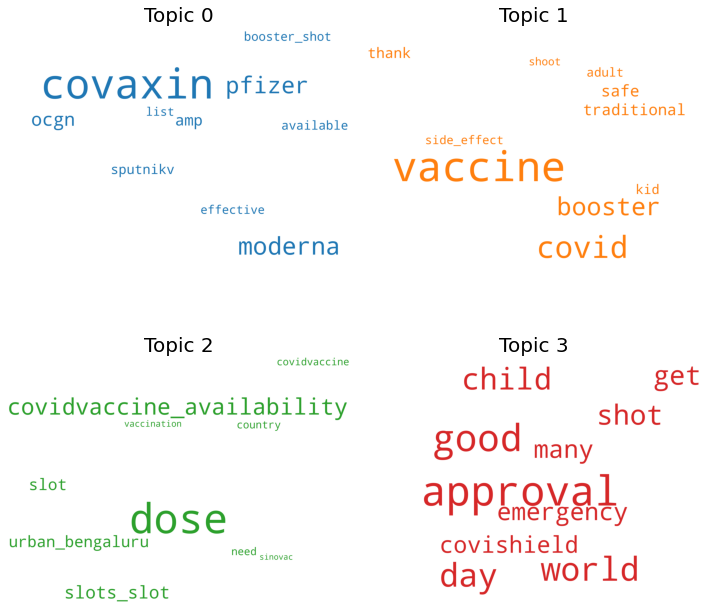

In [ ]:
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=20))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=text_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(n


Perplexity:  -8.800631850156606

Coherence Score:  0.24954118704842693


In [ ]:
pprint(lda_model.top_topics(corpus,topn=10))

[([(0.033087984, 'approval'),
   (0.026741227, 'good'),
   (0.020373667, 'world'),
   (0.020036854, 'day'),
   (0.016830927, 'child'),
   (0.014307325, 'shot'),
   (0.013188912, 'get'),
   (0.011454501, 'many'),
   (0.010947436, 'emergency'),
   (0.009849597, 'covishield')],
  -5.027878004220052),
 ([(0.19327436, 'vaccine'),
   (0.09207992, 'covid'),
   (0.0579906, 'booster'),
   (0.016440088, 'safe'),
   (0.015658662, 'traditional'),
   (0.013441232, 'thank'),
   (0.011179717, 'kid'),
   (0.0098874485, 'adult'),
   (0.009030527, 'side_effect'),
   (0.0074658217, 'shoot')],
  -5.759066054264939),
 ([(0.27827507, 'covaxin'),
   (0.049514472, 'moderna'),
   (0.04450302, 'pfizer'),
   (0.02628484, 'ocgn'),
   (0.017833572, 'amp'),
   (0.012957132, 'sputnikv'),
   (0.011214709, 'available'),
   (0.010883736, 'booster_shot'),
   (0.010185267, 'effective'),
   (0.010070181, 'list')],
  -5.829684283826085),
 ([(0.14644353, 'dose'),
   (0.12444733, 'covidvaccine_availability'),
   (0.06866458,

In [ ]:
pyLDAvis.enable_notebook()
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
pyLDAvis.display(lda_visualization)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model= LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42, update_every=1, chunksize=100, passes=10, alpha='symmetric', per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=text_lemmatized, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(n

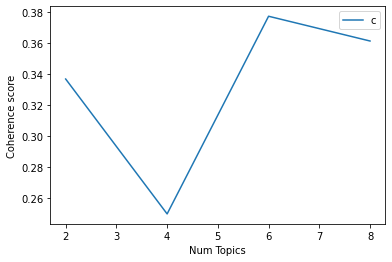

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=text_lemmatized, start=2, limit=10, step=2)
# Show graph
import matplotlib.pyplot as plt
limit=10; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

**05 - LSA**

In [8]:
cleanedtweets = df['text']

In [9]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = cleanedtweets.sample(n=10000, random_state=0).values

print('Tweets BEFORE VECTORIZATION: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Tweets AFTER VECTORIZATION: \n{}'.format(small_document_term_matrix[123]))

Tweets BEFORE VECTORIZATION: lets jandj pauses moderna effective
Tweets AFTER VECTORIZATION: 
  (0, 6493)	1
  (0, 5814)	1
  (0, 3345)	1
  (0, 5357)	1
  (0, 7396)	1


In [10]:
num_topics = 6

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb
import scipy.stats as stats

from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

In [12]:
lsa_model = TruncatedSVD(n_components=num_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [13]:
# Defining the helper functions
def get_keys(topic_matrix):
    '''
    This returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    This returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [14]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [15]:
# Defining the helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    This returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(num_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [16]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  covaxin dose pincode slotsage fees agesdate vaccine hospital covid sep
Topic 2:  vaccine covid moderna sputnikv vaccines sinovac sinopharm doses vaccination pfizer
Topic 3:  slots covidvaccine dose availability bengaluru bbmp urban rural pfizerbiontech sputnikv
Topic 4:  age slotscovaxin bbmp hospital apollo prs jayanagarcovaxinrs crs clinic world
Topic 5:  moderna pfizer shot booster second vaccines dose mrna covidvaccine arm
Topic 6:  sputnik __ _karyakarta delay structure mn propaganda aug military tibetan


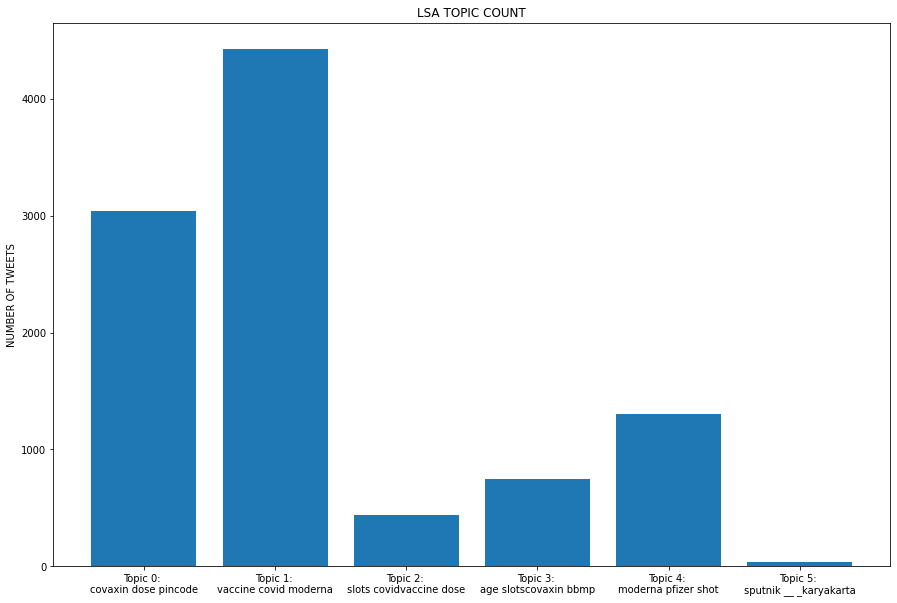

In [21]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(15,10))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('NUMBER OF TWEETS');
ax.set_title('LSA TOPIC COUNT');
plt.show()

In [23]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 6.7 MB/s 
     |████████████████████████████████| 1.1 MB 31.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=ba39e4e04e747c44649495c0bc0426522a1e955efcb84b3373466f02c7d438ec
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=404d527a42084c3b1bb54fa303f1a6bd3f5230cd157e3d7159d7f87101025da5
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


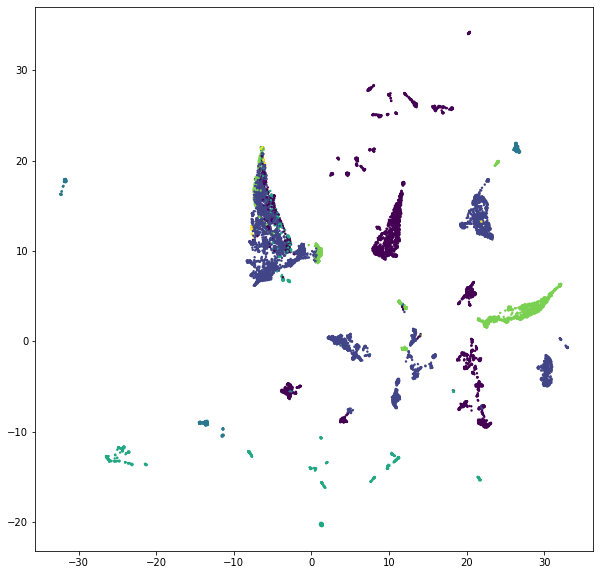

In [24]:
import umap.umap_ as umap

embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(lsa_topic_matrix)

plt.figure(figsize=(10,10))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = lsa_keys,
s = 6, # size
edgecolor='none'
)
plt.show()